This notebook is a solution for kaggle competition:Titanic - Machine Learning from Disaster
https://www.kaggle.com/competitions/titanic

In [508]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

First, load the training dataset and do some preprocessing

In [509]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

train = pd.read_csv("./data/train.csv",header=0,index_col=["PassengerId"])
train = train.drop(["Name","Cabin","Ticket"],axis="columns")

X = train.copy()
y = X.pop("Survived")

In [510]:
features_num = [
    "Age", "SibSp",
    "Parch", "Fare",
]
features_cat = [
    "Pclass", "Sex","Embarked"
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="median"), # for age
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="most_frequent",),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# (1) Define Model  

In [511]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256,"relu",input_shape = input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256,"relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1,"sigmoid"),
])

# (2) Add Optimizer, Loss, and Metric

In [512]:
# YOUR CODE HERE
model.compile(
    optimizer= "Adam",
    loss = "binary_crossentropy",
    metrics = ['binary_accuracy']
)

Epoch 1/200
4/4 [==============================] - 4s 106ms/step - loss: 0.8531 - binary_accuracy: 0.5734 - val_loss: 0.6796 - val_binary_accuracy: 0.6278
Epoch 2/200
4/4 [==============================] - 0s 41ms/step - loss: 0.7513 - binary_accuracy: 0.6422 - val_loss: 0.6655 - val_binary_accuracy: 0.6278
Epoch 3/200
4/4 [==============================] - 0s 39ms/step - loss: 0.7568 - binary_accuracy: 0.6377 - val_loss: 0.6571 - val_binary_accuracy: 0.6143
Epoch 4/200
4/4 [==============================] - 0s 25ms/step - loss: 0.6483 - binary_accuracy: 0.7051 - val_loss: 0.6503 - val_binary_accuracy: 0.6143
Epoch 5/200
4/4 [==============================] - 0s 28ms/step - loss: 0.6189 - binary_accuracy: 0.7365 - val_loss: 0.6441 - val_binary_accuracy: 0.6143
Epoch 6/200
4/4 [==============================] - 0s 26ms/step - loss: 0.5623 - binary_accuracy: 0.7380 - val_loss: 0.6393 - val_binary_accuracy: 0.6143
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 0.5

<Axes: title={'center': 'Accuracy'}>

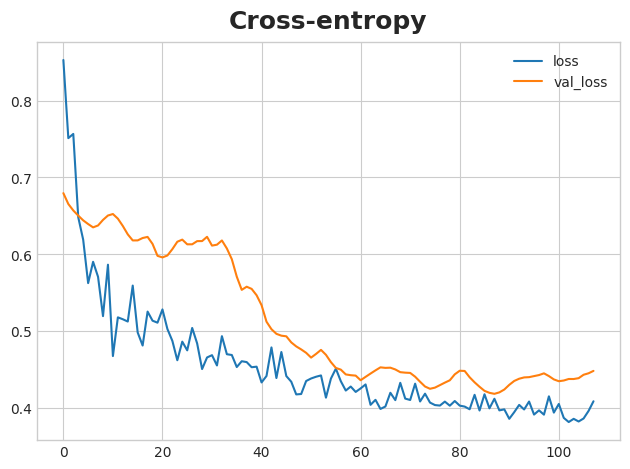

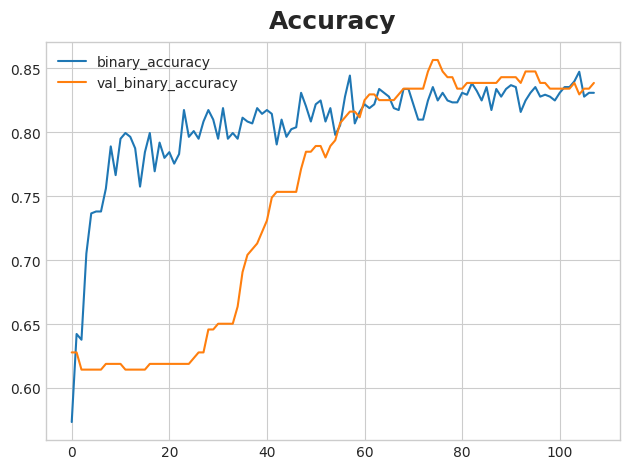

In [513]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=200,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [514]:
test_data = pd.read_csv("./data/test.csv",index_col="PassengerId")

test_data = test_data.drop(["Name","Cabin","Ticket"],axis="columns")

X_test_transformed = preprocessor.transform(test_data)

predictions = model.predict(X_test_transformed)

test_data["Survived"] = [1 if item > 0.5 else 0 for item in predictions]

output = test_data["Survived"].reset_index()

output.to_csv("output.csv",index=False,sep=',')  

14/14 [==============================] - 0s 3ms/step
